## Confusion matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [3]:
confusion_matrix = pd.DataFrame({"Actual_Label" : ['deepseek', 'claude', 'gemini', 'gpt', 'human'],
                                 "deepseek" : [455, 50, 19, 17, 13],
                                 "claude" : [90, 483, 41, 21, 26],
                                 "gemini" : [28, 34, 500, 54, 18],
                                 "gpt" : [19, 15, 33, 504, 14],
                                 "human" : [8, 18, 7, 4, 496]
                        })

In [4]:
confusion_matrix

,Actual_Label,deepseek,claude,gemini,gpt,human
0,deepseek,455,90,28,19,8
1,claude,50,483,34,15,18
2,gemini,19,41,500,33,7
3,gpt,17,21,54,504,4
4,human,13,26,18,14,496


`-` 스코어 산출

In [ ]:
## 교차 검증...
total = confusion_matrix.iloc[:, 1:].sum().sum()
correct = 0

for i in range(5):
    correct += confusion_matrix.iloc[:, 1:].iloc[i, i]

print(f"Acc (Binary): {(total - confusion_matrix.iloc[:, 1:].iloc[1:, 0].sum() - confusion_matrix.iloc[:, 1:].iloc[0, 1:].sum())/total:.4f}")
print(f"Acc (Multi-class): {correct/total:.4f}")
print(f"Balanced Accuracy (Binary): {
    (confusion_matrix.iloc[0, 1]/confusion_matrix.iloc[0, 1:].sum() + \
    (confusion_matrix.iloc[1:, 2:].sum().sum() - confusion_matrix.iloc[1:, 1].sum())/confusion_matrix.iloc[1:, 2:].sum().sum())/2
    :.4f}")
print(f"Balanced Accuracy (Multi-class): {sum([confusion_matrix.iloc[:, 1:].iloc[i, i]/confusion_matrix.iloc[i, 1:].sum() for i in range(5)])/5:.4f}")

## Binary (MGT = 1, human = 0)
TP = confusion_matrix.iloc[:, 1:].iloc[:4, :4].sum().sum().item()
FN = confusion_matrix.iloc[:, 1:].iloc[:4, 4].sum().item()
FP = confusion_matrix.iloc[:, 1:].iloc[4, :4].sum().item()
TN = confusion_matrix.iloc[-1, -1].item()
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print(f"Precision (Binary): {Precision:.4f}")
print(f"Recall (Binary): {Recall:.4f}")
print(f"F1-score (Binary): {2*(Precision*Recall)/(Precision+Recall):.4f}")

Acc (Binary): 0.9178
Acc (Multi-class): 0.8217
Balanced Accuracy (Binary): 0.8573
Balanced Accuracy (Multi-class): 0.8223
Precision (Binary): 0.9708
Recall (Binary): 0.9846
F1-score (Binary): 0.9777


In [12]:
import numpy as np
from sklearn.metrics import classification_report

# 1. Confusion Matrix 데이터 및 레이블 정의
cm = np.array([
    [496, 14, 18, 26, 13],
    [4, 504, 54, 21, 17],
    [7, 33, 500, 41, 19],
    [18, 15, 34, 483, 50],
    [8, 19, 28, 90, 455]
])

labels = ["human", "gpt", "gemini", "claude", "deepseek"]

# 2. Confusion Matrix로부터 y_true, y_pred 재구성
y_true = []
y_pred = []

for true_label_idx, row in enumerate(cm):
    for pred_label_idx, count in enumerate(row):
        y_true.extend([labels[true_label_idx]] * count)
        y_pred.extend([labels[pred_label_idx]] * count)

# --- Multi-class Metrics ---
print("="*15, "Multi-class Metrics", "="*15)

# 리포트를 딕셔너리로 받기
report_dict = classification_report(y_true, y_pred, labels=labels, output_dict=True)

# pandas DataFrame으로 변환하여 출력 형식 지정
df_report = pd.DataFrame(report_dict).transpose()
print(df_report.to_string(float_format=lambda x: f"{x:.4f}"))


# --- Binary Metrics ---
print("\n" + "="*15, "Binary Metrics", "="*15)

negative_class = 'human'
y_true_binary = [0 if label == negative_class else 1 for label in y_true]
y_pred_binary = [0 if label == negative_class else 1 for label in y_pred]
target_names_binary = [negative_class, f'not {negative_class}'] ## [0, 1]

# 이진 분류 리포트를 딕셔너리로 받기
report_binary_dict = classification_report(y_true_binary, y_pred_binary, target_names=target_names_binary, output_dict=True)

# DataFrame으로 변환하여 출력 형식 지정
df_binary_report = pd.DataFrame(report_binary_dict).transpose()
print(df_binary_report.to_string(float_format=lambda x: f"{x:.4f}"))

=============== Multi-class Metrics ===============
              precision  recall  f1-score   support
human            0.9306  0.8748    0.9018  567.0000
gpt              0.8615  0.8400    0.8506  600.0000
gemini           0.7886  0.8333    0.8104  600.0000
claude           0.7307  0.8050    0.7661  600.0000
deepseek         0.8213  0.7583    0.7886  600.0000
accuracy         0.8217  0.8217    0.8217    0.8217
macro avg        0.8266  0.8223    0.8235 2967.0000
weighted avg     0.8254  0.8217    0.8226 2967.0000

=============== Binary Metrics ===============
              precision  recall  f1-score   support
human            0.9306  0.8748    0.9018  567.0000
not human        0.9708  0.9846    0.9777 2400.0000
accuracy         0.9636  0.9636    0.9636    0.9636
macro avg        0.9507  0.9297    0.9397 2967.0000
weighted avg     0.9631  0.9636    0.9632 2967.0000


`-` 시각화

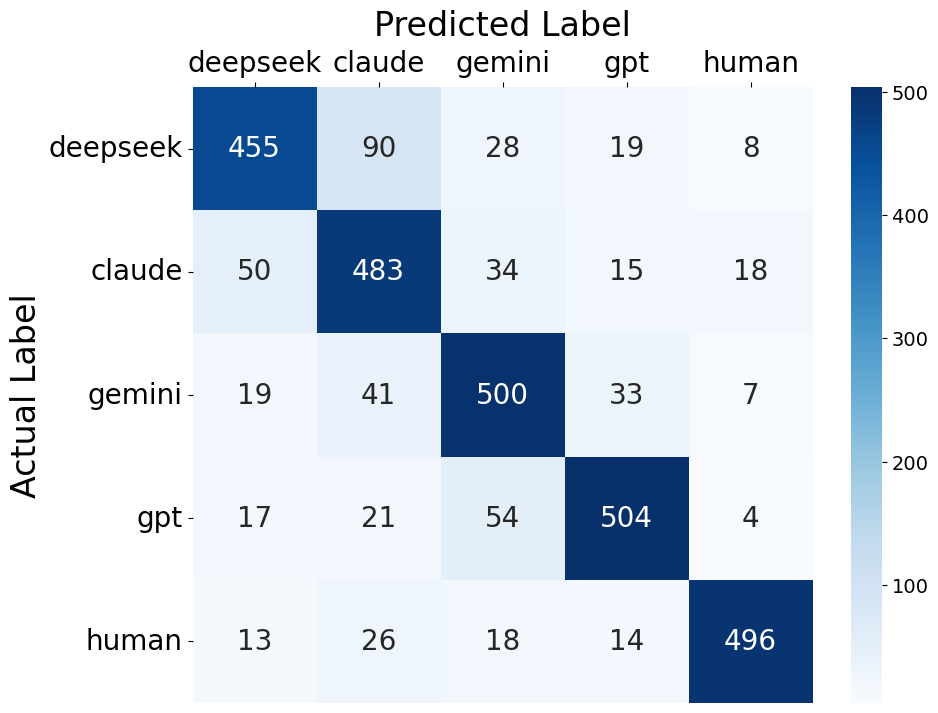

In [18]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(
    confusion_matrix.iloc[:, 1:],
    annot = True,
    annot_kws = {"size": 20},
    fmt = "d",
    cmap = "Blues",
    yticklabels = ['deepseek', 'claude', 'gemini', 'gpt', 'human']
)

ax.tick_params(axis = "x", top = True, bottom = False, labeltop = True, labelbottom = False)
ax.set_title("Predicted Label", fontsize = 24, pad = 10)
ax.set_ylabel("Actual Label", fontsize = 24)

cb = ax.collections[0].colorbar
cb.ax.tick_params(labelsize = 14)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20, rotation = 0)
plt.savefig("original_confusion_matrix.png", dpi = 300, bbox_inches = "tight")